In [1]:
import cv2
import numpy as np
import random 
from matplotlib import pyplot as plt
from brisque import BRISQUE

In [2]:
def imshow(title='Image', image = None,size =5):
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(aspect_ratio*size, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
def score(image):
    obj = BRISQUE(url = False)
    return obj.score(image)

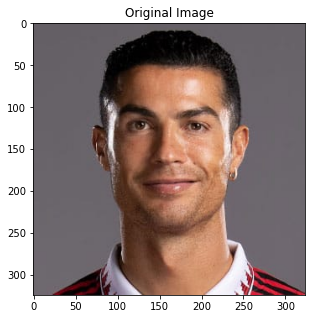

[[[101  95 100]
  [101  95 100]
  [101  95 100]
  ...
  [104  98 103]
  [104  98 103]
  [104  98 103]]

 [[101  95 100]
  [101  95 100]
  [101  95 100]
  ...
  [104  98 103]
  [104  98 103]
  [104  98 103]]

 [[101  95 100]
  [101  95 100]
  [101  95 100]
  ...
  [104  98 103]
  [104  98 103]
  [104  98 103]]

 ...

 [[112 104 111]
  [112 104 111]
  [112 104 111]
  ...
  [ 44  36 113]
  [ 42  36  93]
  [ 48  46  92]]

 [[112 104 111]
  [112 104 111]
  [112 104 111]
  ...
  [ 69  51 180]
  [ 50  35 143]
  [ 33  20 118]]

 [[112 104 111]
  [112 104 111]
  [112 104 111]
  ...
  [ 72  48 204]
  [ 85  65 201]
  [ 86  68 193]]]
Image score is: 29.97069297601874


In [21]:
original_image = cv2.imread("C:\\Users\\baksh\\Desktop\\major_project\\images\\WhatsApp Image 2023-03-14 at 19.00.28 (2).jpg")
imshow('Original Image', original_image)
print(original_image)
print("Image score is:",score(original_image))

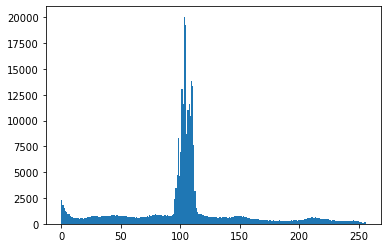

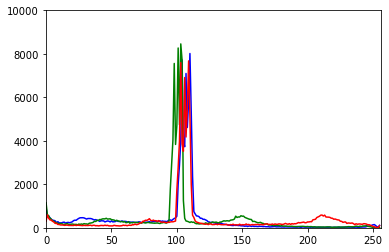

In [5]:
plt.hist(original_image.ravel(),256,[0,256])
plt.show()

#now seperating the color channels
color = ('b', 'g', 'r')
# seperating the color channels and plotting the histogram 
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([original_image],[i],None,[256],[0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.ylim([0,10000])
    
plt.show()

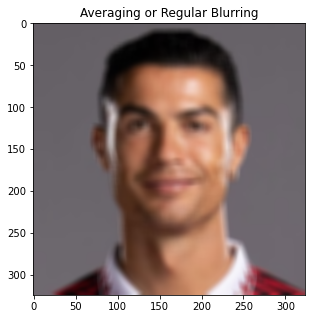

Image score is: 86.36628675201493


In [22]:
#adding regular Blur 
blur = cv2.blur(original_image,(9,9))
imshow('Averaging or Regular Blurring',blur)
print("Image score is:",score(blur))

In [23]:
cv2.imwrite("C:\\Users\\baksh\\Desktop\\major_project\\images\\blur.jpg",blur)

True

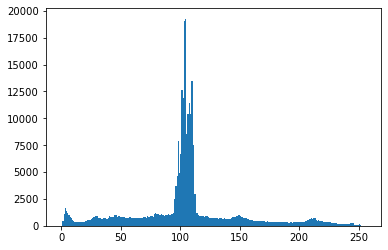

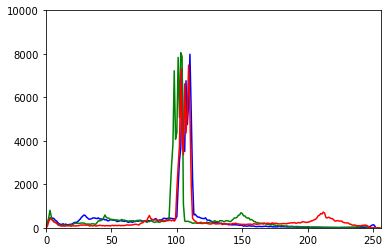

In [9]:
plt.hist(blur.ravel(),256,[0,256])
plt.show()

#now seperating the color channels
color = ('b', 'g', 'r')
# seperating the color channels and plotting the histogram 
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([blur],[i],None,[256],[0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.ylim([0,10000])
    
plt.show()

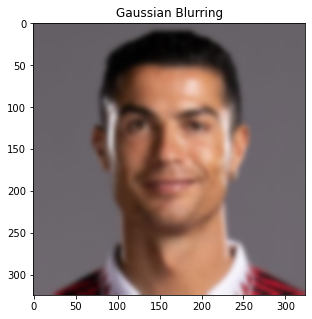

Image score is: 89.46644973816885


In [24]:
# adding Gaussian Blur
gaussian_blur = cv2.GaussianBlur(original_image,(17,17),0)
imshow('Gaussian Blurring', gaussian_blur)
print("Image score is:",score(gaussian_blur))

In [25]:
cv2.imwrite("C:\\Users\\baksh\\Desktop\\major_project\\images\\gaussinan_blur.jpg",gaussian_blur)

True

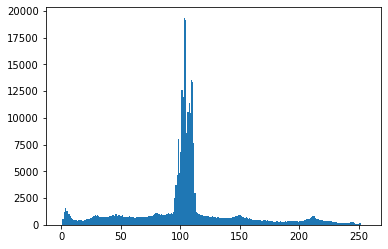

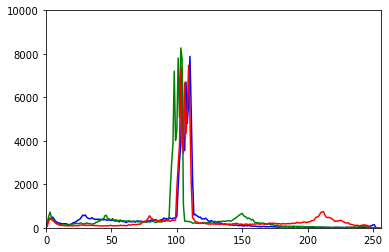

In [12]:
plt.hist(gaussian_blur.ravel(),256,[0,256])
plt.show()

#now seperating the color channels
color = ('b', 'g', 'r')
# seperating the color channels and plotting the histogram 
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([gaussian_blur],[i],None,[256],[0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.ylim([0,10000])
    
plt.show()

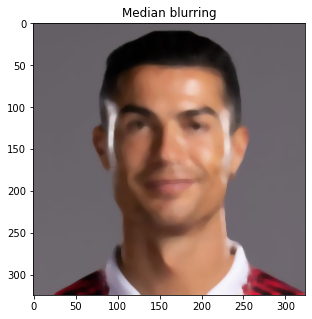

Image score is: 75.77668849991821


In [26]:
# now adding median blur to the image
median = cv2.medianBlur(original_image,9)
imshow('Median blurring',median)
print("Image score is:",score(median))

In [28]:
cv2.imwrite("C:\\Users\\baksh\\Desktop\\major_project\\images\\median.jpg",median)

True

In [15]:
def addWhiteNoise(image):
    #setting the range of random probablity
    # larger the prob larger will be the noise 
    prob = random.uniform(0.05,0.1)
    #generating a random matrix in the shape of the impur image 
    rnd = np.random.rand(image.shape[0], image.shape[1])
    # If the random values in our rnd matrix are less than our random probability
    # we randomly change that pixel in our input image to value within the range speciffied 
    image [rnd<prob]=np.random.randint(50,230)
    return image 

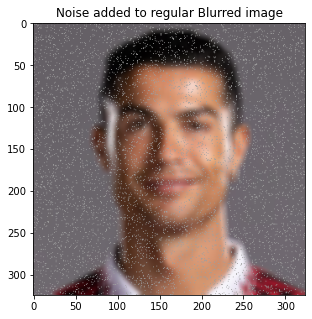

Image score is: 97.25444155969589


In [16]:
# appling the noise function to our blurred image 
Ronaldo1 = addWhiteNoise(blur)
imshow('Noise added to regular Blurred image', Ronaldo1)
print("Image score is:",score(Ronaldo1))

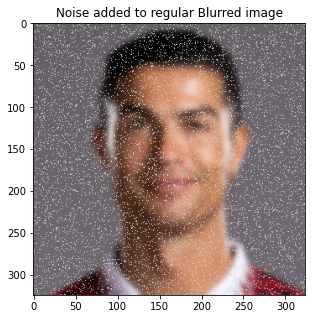

Image score is: 155.845


In [17]:
# appling the noise function to our blurred image 
Ronaldo2 = addWhiteNoise(gaussian_blur)
imshow('Noise added to regular Blurred image', Ronaldo2)
print("Image score is:",score(Ronaldo2))

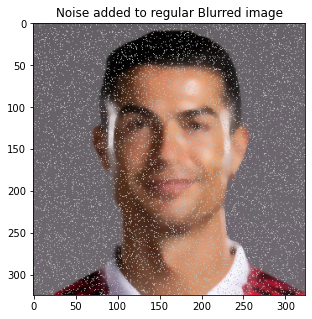

Image score is: 111.1820575406407


In [18]:
#appling the noise function to our blurred image 
Ronaldo3 = addWhiteNoise(median)
imshow('Noise added to regular Blurred image', Ronaldo3)
print("Image score is:",score(Ronaldo3))

In [20]:
cv2.imwrite("C:\\Users\\baksh\\Desktop\\major_project\\images\\Ronaldo1.jpg",Ronaldo1)
cv2.imwrite("C:\\Users\\baksh\\Desktop\\major_project\\images\\Ronaldo2.jpg",Ronaldo2)
cv2.imwrite("C:\\Users\\baksh\\Desktop\\major_project\\images\\Ronaldo3.jpg",Ronaldo3)

True